In [128]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions_co2 import *

home_path = r'C:\\Users\joche\FIM Kernkompetenzzentrum\Projekt VIdES - Dokumente\General\07_Arbeitsordner\04_Ergebnisse\20220920_Ergebnisse_4_Wochen'
sns.set_style('white')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
uc_nr = '3'
level = 'ec'
nr_months = 4
uc_dir = [i.path for i in os.scandir(home_path) if i.is_dir() if f'case_{uc_nr}' in i.name.lower()][0]
df_temp = get_childrens_co2(uc_nr, uc_dir, nr_months, level=level)
df_ecs = df_temp[[i for i in df_temp if 'share_renewable' in i]]
df_ecs

,region_1_ec1_share_renewable [%],region_1_ec2_share_renewable [%],region_1_ec4_share_renewable [%],region_1_ec3_share_renewable [%],region_1_ec5_share_renewable [%],region_1_ec0_share_renewable [%],region_2_ec4_share_renewable [%],region_2_ec3_share_renewable [%],region_2_ec0_share_renewable [%],region_2_ec2_share_renewable [%],...,region_5_ec5_share_renewable [%],region_5_ec3_share_renewable [%],region_5_ec1_share_renewable [%],region_5_ec4_share_renewable [%],region_6_ec3_share_renewable [%],region_6_ec2_share_renewable [%],region_6_ec5_share_renewable [%],region_6_ec1_share_renewable [%],region_6_ec0_share_renewable [%],region_6_ec4_share_renewable [%]
2030-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.179576,0.000000,0.0,0.000000
2030-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.387133,0.000000,0.000000,0.000000,0.0,0.000000
2030-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.090496,0.000000,0.247263,0.0,0.105934
2030-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.129745,0.000000,0.233976,0.0,0.118763
2030-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.516408,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030-10-07 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.069101,0.151297,0.000000,0.194671,0.0,0.389625
2030-10-07 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.648367,0.000000,0.150315,0.0,0.402018
2030-10-07 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.374380,0.334406,0.000000,0.000000,0.0,0.430571
2030-10-07 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.352082,0.651267,0.000000,0.563290,0.0,0.003925


In [125]:
uc_nr = '3'
level = 'ec'
nr_months = 4
uc_dir = [i.path for i in os.scandir(home_path) if i.is_dir() if f'case_{uc_nr}' in i.name.lower()][0]
# create empty df with date time index
df_out = pd.DataFrame(index=get_datetime_index(uc_dir, nr_months))
df_out_index = df_out.index
# obtain all relevant -trades.csv files for uc_nr
fpaths = get_files_for_uc(uc_nr, uc_dir, nr_months, level=level)
# get lists of all months filepaths for all parents
parents_paths = [fpaths[i::int(len(fpaths)/nr_months)] for i in range(int(len(fpaths)/nr_months))]
cs_names = []
p_paths = parents_paths[0]
df_p = get_combined_df_p(p_paths, uc_nr)
# get children (cs) and parent (p)
all_entities = set(df_p.seller) | set(df_p.buyer)
cs = set([i for i in df_p.seller if level in i] + [i for i in df_p.buyer if level in i])
p = all_entities - cs
c = next(iter(cs))
cs_names.append(c)

StopIteration: 

In [91]:
# get energy received from other children (green) and from parent (grey)
c_green_in, c_grey_in = get_c_trades_dfs({c}, p, cs, df_p, df_out_index)

In [113]:
c_grey_in_new = c_grey_in - (1 - df[[i for i in df.columns if next(iter(p)) in i]].iloc[:,0]) * c_grey_in
c_green_in_new = c_green_in + df[[i for i in df.columns if next(iter(p)) in i]].iloc[:,0] * c_grey_in

2030-01-01 00:00:00    12.366439
2030-01-01 01:00:00     0.000000
2030-01-01 02:00:00     0.000000
2030-01-01 03:00:00     0.000000
2030-01-01 04:00:00     0.000000
                         ...    
2030-10-07 19:00:00     3.171713
2030-10-07 20:00:00    11.783080
2030-10-07 21:00:00    11.869364
2030-10-07 22:00:00    14.738899
2030-10-07 23:00:00    11.927407
Length: 672, dtype: float64

In [ ]:
# calculate emissions based on factors for green and grey energy [g/kWh]
c_co2e = co2_footprint(c_green_in, c_grey_in)
# calculate share renewables, i.e. share green energy [%]
c_share_green = share_renewable(c_green_in, c_grey_in)
# add children to series name
c_green_in, c_grey_in, c_co2e, c_share_green = rename_e_series(c_green_in, c_grey_in, c_co2e, c_share_green, c)
# append to df_out
df_out = pd.concat([df_out, pd.concat([c_green_in, c_grey_in, c_co2e, c_share_green], axis=1)], axis=1)

In [ ]:
df = get_childrens_co2(uc_nr, uc_dir, nr_months, level='region')
df = df[[i for i in df.columns if 'share_renewable' in i]]
df

---

In [129]:
# for each use case, calculate co2 bottom up
ucs = [i for i in range(7)] + ['2-1', '2-2']
df_dict = dict()
for i in ucs:
    df = kpi_calculation(home_path, uc_nr=i)
    df_dict[f'use case {i}'] = df
df_dict.keys()

dict_keys(['use case 0', 'use case 1', 'use case 2', 'use case 3', 'use case 4', 'use case 5', 'use case 6', 'use case 2-1', 'use case 2-2'])

In [130]:
# save german co2 emissions for each use case
tmp_ger = dict()
for key in df_dict:
    tmp_ger[key] = df_dict[key]['germany_co2e_emissions [kg]'].sum(axis=0)
tmp_ger.keys()

# total germany co2 emissions comparison base case vs. use case i
def plot_germany_vs_uci(tmp_ger, uci):
    uci = str(uci)
    uc0_key, uci_key = [i for i in tmp_ger.keys() if '0' in i][0], [i for i in tmp_ger.keys() if uci in i][0]
    uc0_label, uci_label = f'use case 0', f'use case {uci}'
    uc0_co2_ger, uci_co2_ger = round(tmp_ger[uc0_key]/1000,2), round(tmp_ger[uci_key]/1000,2)
    fig, ax = plt.subplots(figsize = (10,5), facecolor = 'w')
    uc0 = ax.bar(uc0_label, uc0_co2_ger, color = (206/235,150/235,191/235))
    uci = ax.bar(uci_label, uci_co2_ger, color = (184/235,50/235,138/235))
    ax.set_title('Total CO2e emissions for germany over simulation period by use case')
    ax.set_ylabel('tCO2e')
    ax.bar_label(uc0, padding=3)
    ax.bar_label(uci, padding=3)
    ax.set_ylim(0, max(uc0_co2_ger, uci_co2_ger) * 1.1)
    sns.despine()
    
    return fig

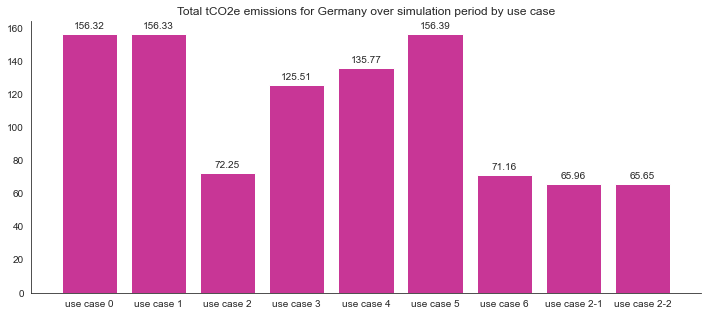

In [131]:
# total germany co2 emissions for all use cases
fig, ax = plt.subplots(figsize = (12,5), facecolor='w')
for key in tmp_ger:
    t = ax.bar(key, round(tmp_ger[key]/1000,2), color = (184/235,50/235,138/235))
    ax.bar_label(t, padding=3)
ax.set_title('Total tCO2e emissions for Germany over simulation period by use case')
sns.despine()
plt.show()

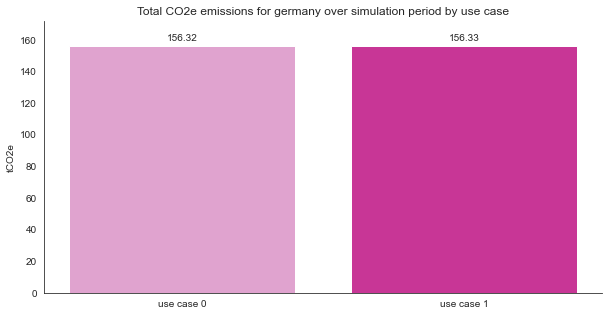

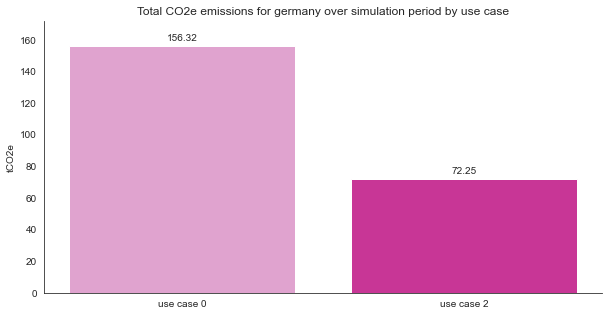

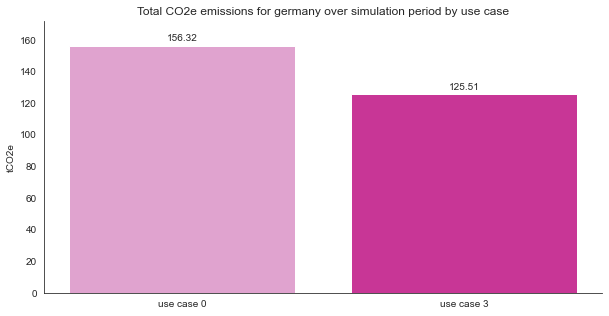

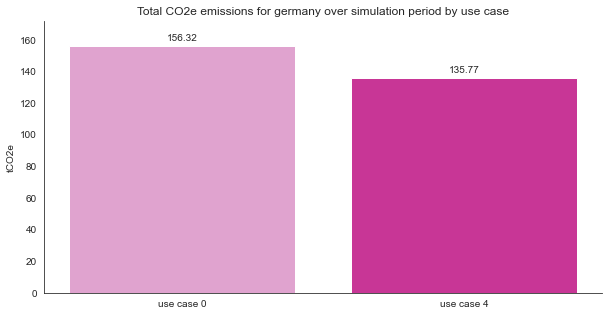

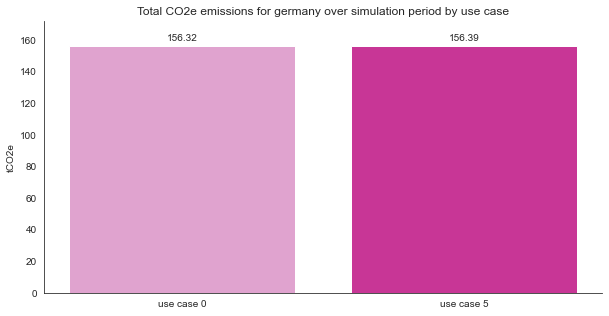

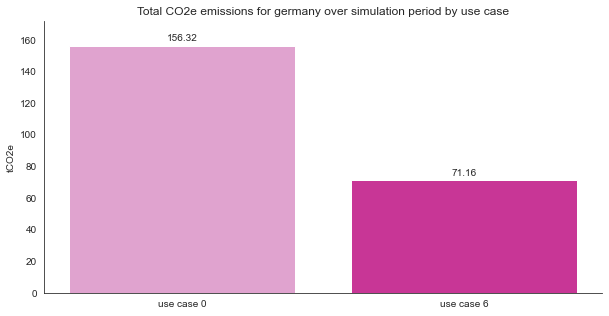

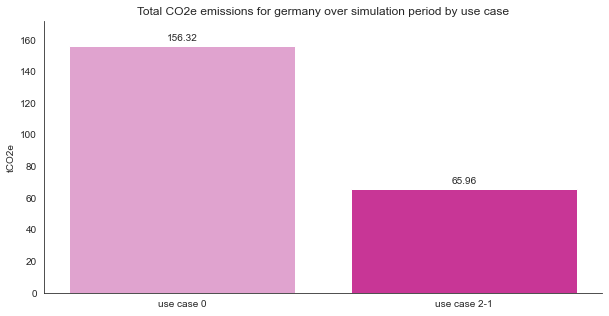

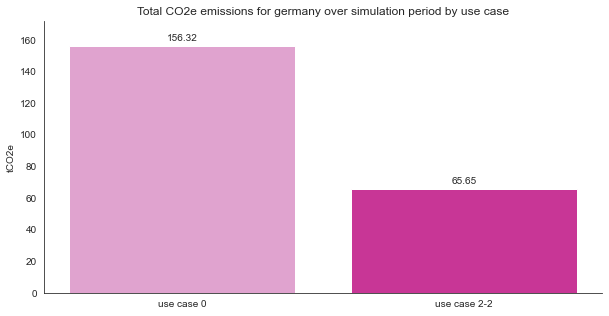

In [132]:
for uc in ucs[1:]:
    fig = plot_germany_vs_uci(tmp_ger, uci=uc)

In [133]:
def get_level_measure_dict(df_dict, level = None, measure = None):
    if level not in ['germany', 'regions']:
        raise Exception(f'ERROR: level: {level} not in [germany, regions].')
    if measure not in ['co2', 'green_energy', 'grey_energy', 'share_renewable']:
        raise Exception(f'ERROR: measure: {measure} not in [co2, green_energy, grey_energy, share_renewable].')
    tmp_out = dict()
    for key in df_dict:
        df_tmp = df_dict[key]
        if level == 'germany':
            tmp_out[key] = df_tmp[[i for i in df_tmp.columns if measure in i if level in i]]
        else:
            tmp_out[key] = df_tmp[[i for i in df_tmp.columns if measure in i if not 'ec' in i if not 'germany' in i]]
    
    return tmp_out

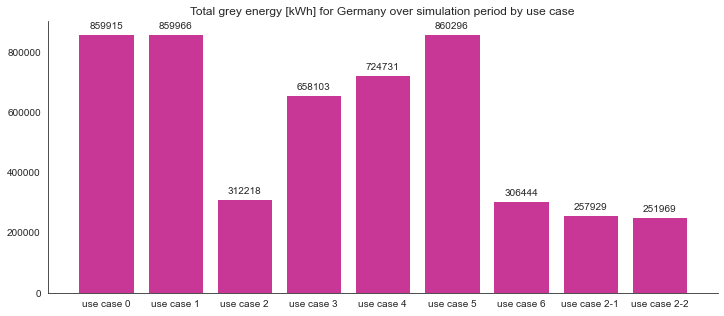

In [134]:
fig, ax = plt.subplots(figsize = (12,5), facecolor = 'w')
tmp = get_level_measure_dict(df_dict, level='germany', measure='grey_energy')
for key in tmp:
    t = ax.bar(key, round(tmp[key].sum(axis=0)[0],2), color = (184/235,50/235,138/235))
    ax.bar_label(t, padding=3)
ax.set_title('Total grey energy [kWh] for Germany over simulation period by use case')
sns.despine()
plt.show()

In [135]:
# total regional co2 emissions comparison base case vs. use case i
def plot_regions_vs_uci(tmp_regions, uci):
    uci = str(uci)
    uc0_key, uci_key = [i for i in tmp_regions.keys() if '0' in i][0], [i for i in tmp_regions.keys() if uci in i][0]
    labels, uc0_co2_regions, uci_co2_regions = [], [], []
    for r in range(1,7):
        labels.append(f'region-{r}')
        uc0_co2_regions.append(round(tmp_regions[uc0_key][[i for i in tmp_regions[uc0_key] if f'region_{r}' in i]].sum(axis=0)[0]/1000,2))
        uci_co2_regions.append(round(tmp_regions[uci_key][[i for i in tmp_regions[uci_key] if f'region_{r}' in i]].sum(axis=0)[0]/1000,2))
    width = 0.4
    x = np.arange(len(labels))
    fig, ax = plt.subplots(figsize = (10,5), facecolor = 'w')        
    uc0 = ax.bar(x - width/2, uc0_co2_regions, width, label = f'use case 0', color = (206/235,150/235,191/235))
    uci = ax.bar(x + width/2, uci_co2_regions, width, label = f'use case {uci}', color = (184/235,50/235,138/235))
    ax.set_title('Total CO2e emissions over simulation period by region and use case')
    ax.set_ylabel('tCO2e')
    ax.set_xticks(x, labels)
    ax.legend()
    ax.bar_label(uc0, padding=3)
    ax.bar_label(uci, padding=3)
    ax.set_ylim(0, max(max(uc0_co2_regions), max(uci_co2_regions)) * 1.1)
    sns.despine()
    
    return fig

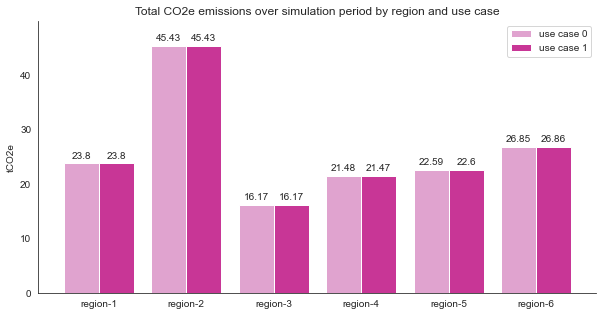

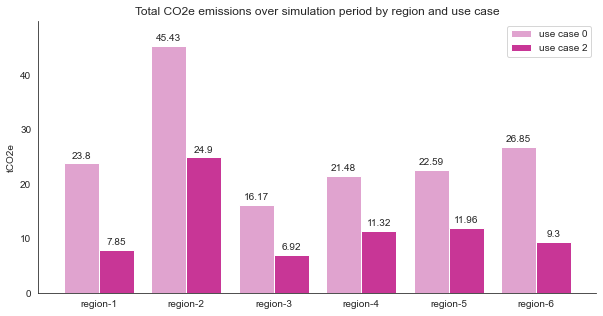

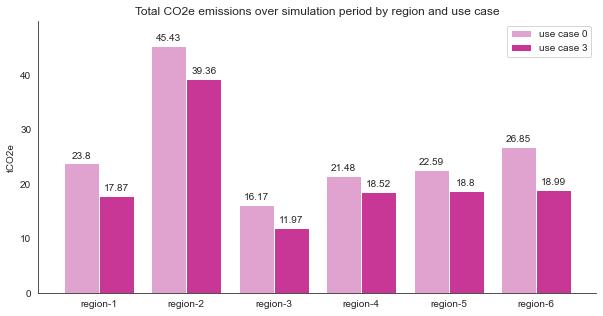

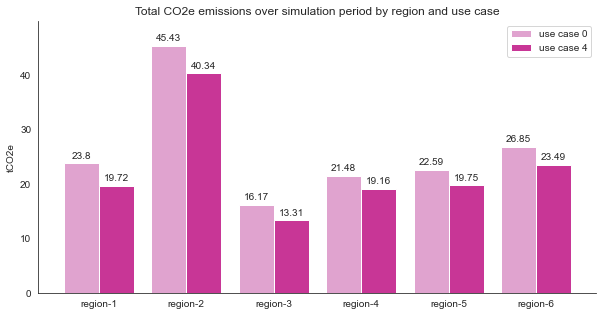

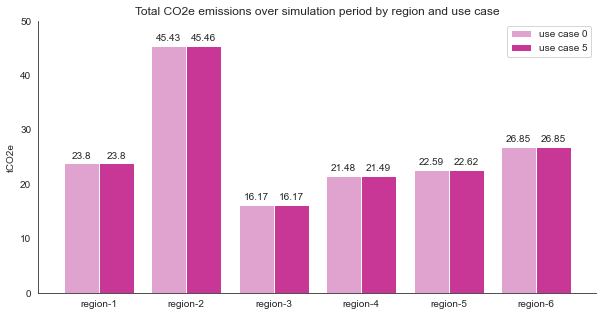

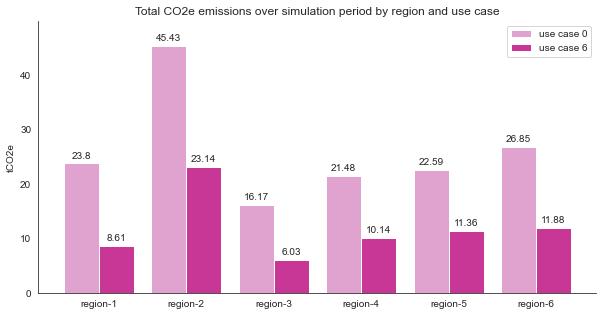

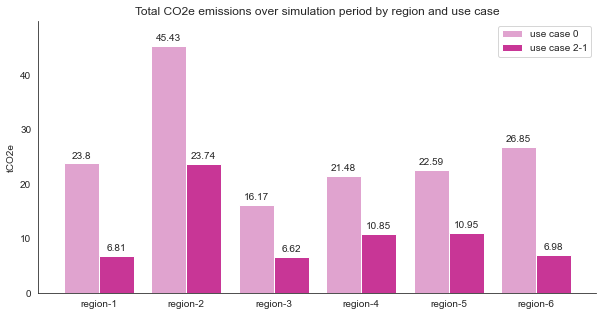

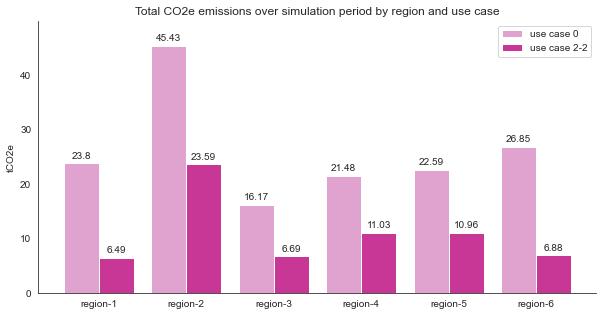

In [136]:
tmp_regions_co2 = get_level_measure_dict(df_dict, level='regions', measure='co2')
for uc in ucs[1:]:
    fig = plot_regions_vs_uci(tmp_regions_co2, uci=uc)